In [90]:
%pylab inline
from pathlib import Path
import h5py
import sys
path_to_script =  Path("~/projects/scaffan/").expanduser()
sys.path.insert(0,str(path_to_script))
import scaffan
import io3d
import scaffan.image as scim
import scipy
import scipy.ndimage.morphology


Populating the interactive namespace from numpy and matplotlib


In [91]:
tile_size = 28
# distance between tile centers
step = 28
hdf5_path = "scaffan_dataset.hdf5"
pixelsize_mm = [0.003, 0.003]

In [92]:
import os
print(os.getenv("PATH"))
syspth = str(os.getenv("PATH"))
ind = syspth.find("openslide")
ind

C:\Users\Jirik\Downloads\openslide-win64-20171122\bin;C:\Users\Jirik\Miniconda3\envs\scaffan\Library\bin;C:\Users\Jirik\Miniconda3\envs\scaffan\Library\bin;C:\Users\Jirik\Miniconda3\envs\scaffan\Library\bin;C:\Users\Jirik\Miniconda3\envs\scaffan;C:\Users\Jirik\Miniconda3\envs\scaffan\Library\mingw-w64\bin;C:\Users\Jirik\Miniconda3\envs\scaffan\Library\usr\bin;C:\Users\Jirik\Miniconda3\envs\scaffan\Library\bin;C:\Users\Jirik\Miniconda3\envs\scaffan\Scripts;C:\Users\Jirik\Miniconda3\envs\scaffan\bin;C:\Users\Jirik\Miniconda3\condabin;C:\Users\Jirik\AppData\Local\cmder\bin;C:\Users\Jirik\AppData\Local\cmder\vendor\bin;C:\Users\Jirik\AppData\Local\cmder\vendor\conemu-maximus5\ConEmu\Scripts;C:\Users\Jirik\AppData\Local\cmder\vendor\conemu-maximus5;C:\Users\Jirik\AppData\Local\cmder\vendor\conemu-maximus5\ConEmu;C:\Program Files (x86)\Intel\Intel(R) Management Engine Components\iCLS;C:\Program Files\Intel\Intel(R) Management Engine Components\iCLS;C:\WINDOWS\system32;C:\WINDOWS;C:\WINDOWS\S

25

In [93]:
fn = io3d.datasets.join_path("medical", "orig", "CMU-1.ndpi", get_root=True)
fn = io3d.datasets.join_path("medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi", get_root=True)
anim = scim.AnnotatedImage(fn)

2019-07-11 10:00:24.975 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi
2019-07-11 10:00:25.004 | DEBUG    | scaffan.image:__init__:180 - Reading the annotation
2019-07-11 10:00:28.359 | DEBUG    | scaffan.annotation:read_annotations:119 - windows annotation output:b'2019-07-11 10:00:28.044 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\r\n'


In [94]:
an_ids = anim.select_annotations_by_color("#00FF00")
an_ids



[0, 2, 3, 5, 7, 8]

In [95]:
anim.annotations

[{'title': '',
  'color': '#00ff00',
  'x': [7574386,
   7566584,
   7549418,
   7526015,
   7505730,
   7488564,
   7468277,
   7451114,
   7433948,
   7424585,
   7419908,
   7416789,
   7415228,
   7415228,
   7415228,
   7415228,
   7415228,
   7416789,
   7418347,
   7421466,
   7426146,
   7432391,
   7438632,
   7444870,
   7452675,
   7462039,
   7471395,
   7480759,
   7487003,
   7496367,
   7505730,
   7511968,
   7518209,
   7527576,
   7535375,
   7549418,
   7561900,
   7568145,
   7579066,
   7583746,
   7593113,
   7614955,
   7632121,
   7649280,
   7660204,
   7666449,
   7674248,
   7682053,
   7692972,
   7700777,
   7707018,
   7711698,
   7713259,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7716378,
   7721062,
   7721062,
   7724184,
   7724184,
   7727303,
   7727303],
  'y': [-1867439,
   -1869001,
   -1869001,
   -1865878,
   -1858066,
   -1848694,
   -1836196,
   -1823697,
   -1809638,
   -1798702,
   -1790890,
   -1779954,
   -1767457,
   

In [96]:
an_ids_sel1 = anim.select_annotations_by_color("#000000", raise_exception_if_not_found=True)
type(an_ids_sel1)
outer_ids = anim.select_outer_annotations(0, color="#000000")
outer_ids 

[10]

# With known annotations

In [97]:
def nonzero_with_step(data, step):
#     print(data.shape)
    datastep = data[::step, ::step]
#     print(datastep.shape)
    nzx, nzy = np.nonzero(datastep)
    
    return nzx* step, nzy * step

In [98]:
ani = 0
ann_id = outer_ids[0]
view = anim.get_views(outer_ids, pixelsize_mm=pixelsize_mm)[ani]
seg_true = view.get_annotation_region_raster(annotation_id=outer_ids[ani]) > 0
dst = scipy.ndimage.morphology.distance_transform_edt(seg_true)
middle_pixels = dst > (tile_size/2)
nz = nonzero_with_step(middle_pixels, step)
# display(seg_true.shape)
global_locations = view.coords_view_px_to_glob_px(*nz)


In [99]:
# def get_global_centers_from_annotations(anim, ann_id:int, pixelsize_mm, tile_size, step):
#     outer_ids = [ann_id]
#     ani=0
#     view = anim.get_views(outer_ids, pixelsize_mm=pixelsize_mm)[ani]
#     seg_true = view.get_annotation_region_raster(annotation_id=ann_id) > 0
#     dst = scipy.ndimage.morphology.distance_transform_edt(seg_true)
#     middle_pixels = dst > (tile_size/2)
#     nz = nonzero_with_step(middle_pixels, step)
# #     print("seg_true shape",seg_true.shape)
# #     print("nznz")
#     global_locations = view.coords_view_px_to_glob_px(*nz)
#     return global_locations

# #     gl_centers = []
# #     views = anim.get_views(outer_ids, pixelsize_mm=pixelsize_mm)
# #     for ani in range(0,len(outer_ids)):
# #         pixelsize_mm = [0.004, 0.004]
# #         view = views[ani]
# #         seg_true = view.get_annotation_region_raster(annotation_id=outer_id[ani]) > 0
# #         dst = scipy.ndimage.morphology.distance_transform_edt(seg_true)
# #         middle_pixels = dst > (tile_size/2)
# #         nz = nonzero_with_step(middle_pixels, step)
# #         # display(seg_true.shape)
# #         global_locations = view.coords_view_px_to_glob_px(*nz)
# #         gl_centers.append(global_locations)
# #     return gl_centers

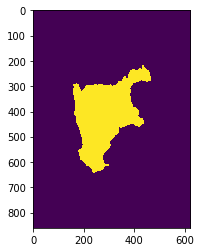

In [100]:
plt.imshow(seg_true)

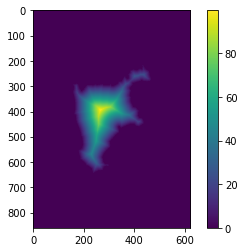

In [101]:
# dst = scipy.ndimage.morphology.distance_transform_edt(seg_true, sampling=pixelsize_mm)
imshow(dst)
plt.colorbar()

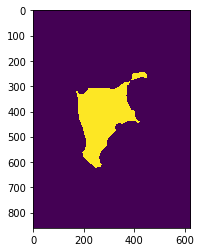

In [102]:

plt.imshow(middle_pixels)

In [103]:

nz

(array([252, 252, 308, 308, 336, 336, 336, 336, 336, 336, 336, 364, 364,
        364, 364, 364, 364, 364, 392, 392, 392, 392, 392, 392, 392, 420,
        420, 420, 420, 420, 420, 420, 420, 448, 448, 448, 448, 448, 476,
        476, 476, 476, 504, 504, 504, 532, 532, 532, 560, 560, 560, 588,
        588, 616], dtype=int64),
 array([392, 420, 336, 364, 196, 224, 252, 280, 308, 336, 364, 196, 224,
        252, 280, 308, 336, 364, 196, 224, 252, 280, 308, 336, 364, 196,
        224, 252, 280, 308, 336, 364, 392, 196, 224, 252, 280, 308, 224,
        252, 280, 308, 224, 252, 280, 224, 252, 280, 196, 224, 252, 224,
        252, 252], dtype=int64))

In [104]:

def get_patches(img, mask, tile_size, step, control_image=False):
    if img.shape[:2] != mask.shape[:2]:
        print("Mask shape have to same as img shape")
        return 
    if control_image:
        control = zeros_like(img,dtype=np.uint8)
    tile05 = int(floor(tile_size/2))
    imgs = []
#     nz = nonzero_with_step(middle_pixels, step)
    
#     logger.debug(f"img.shape: {img.shape}")
#     print(f"img.shape: {img.shape}, {mask.shape}")
    for indx in range(0, img.shape[0] - tile_size, step):
        for indy in range(0, img.shape[1] - tile_size, step):
            if mask[indx + tile05, indy + tile05] > 0:
                startx = indx - tile05
                startx = indx - tile05
                sl0 = slice(indx, indx+tile_size)
                sl1 = slice(indy, indy+tile_size)
                img0 = img[sl0, sl1]
                if img0.shape == (tile_size, tile_size):
                    imgs.append(img0)
                    if control_image:
                        control[indx + tile05, indy + tile05] = 1
    if control_image:
        return imgs, control
    return imgs
            

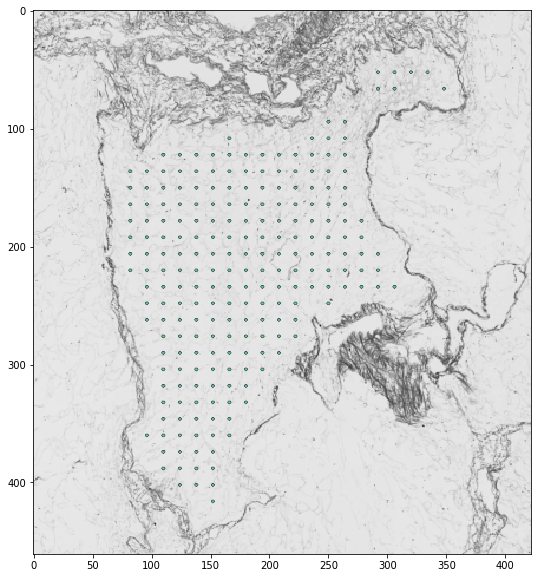

In [105]:

img = view.get_region_image(as_gray=True)
imgs, cim = get_patches(img, middle_pixels, tile_size, int(tile_size/2), control_image=True)
sl0 = slice(200,-200)
sl1 = slice(100,-100)
plt.figure(figsize=(10,10))
plt.imshow(img[sl0, sl1], cmap="gray", vmin=0, vmax=1)
plt.contour(cim[sl0,sl1])




225

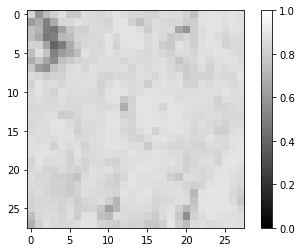

In [106]:

plt.imshow(imgs[0], cmap='gray', vmin=0, vmax=1)
plt.colorbar()
len(imgs)

In [107]:


def get_inner_pixels(view, ann_id, pixelsize_mm, tile_size):
    seg_true = view.get_annotation_region_raster(annotation_id=ann_id) > 0
    dst = scipy.ndimage.morphology.distance_transform_edt(seg_true)
    middle_pixels = dst > (tile_size/2)
    return middle_pixels
    
def get_patches_from_inside_of_annotation(anim, ann_id, pixelsize_mm, tile_size, step, as_gray=True):
    outer_ids = [ann_id]
    ani=0
    view = anim.get_views(outer_ids, pixelsize_mm=pixelsize_mm)[ani]
    middle_pixels = get_inner_pixels(view, ann_id, pixelsize_mm=pixelsize_mm, tile_size=tile_size)
    img_big = view.get_region_image(as_gray=True)
#     print(f"img big: {img_big.shape}, middle pixels: {middle_pixels.shape}")
    imgs = get_patches(img_big, middle_pixels, tile_size, step, control_image=False)
    return imgs

In [108]:

def get_close_pixels(view, ann_id, pixelsize_mm, max_dist_px):
    seg_true = view.get_annotation_region_raster(annotation_id=ann_id) > 0
    dst = scipy.ndimage.morphology.distance_transform_edt(seg_true)
    middle_pixels1 = dst < max_dist_px
    
    dst = scipy.ndimage.morphology.distance_transform_edt(~seg_true)
    middle_pixels2 = dst < max_dist_px
    
    middle_pixels = ((middle_pixels1 & middle_pixels2))# > 0).astype(np.int)
#     dst = scipy.ndimage.morphology.distance_transform_edt(seg_true)
    return middle_pixels#, middle_pixels1, middle_pixels2, dst

def get_patches_along_mask(img, seg_close, max_dist_px, control_image=False):
    
    if control_image:
        control = np.zeros_like(seg_close, dtype=np.uint8)
    nz = np.nonzero(seg_close)
    inds0 = nz[0][::(step * max_dist_px*2)]
    inds1 = nz[1][::(step * max_dist_px*2)]
    tile05 = int(floor(tile_size/2))
    imgs = []
    for ind0, ind1 in zip(inds0, inds1):
        indx = ind0 - tile05
        indy = ind1 - tile05
        sl0 = slice(indx, indx+tile_size)
        sl1 = slice(indy, indy+tile_size)
        img0 = img[sl0, sl1]
        if img0.shape == (tile_size, tile_size):
            imgs.append(img0)
            if control_image:
                control[ind0, ind1] = 1
    if control_image:
        return imgs, control
    return imgs



def get_patches_along_annotation(anim, ann_id, pixelsize_mm, tile_size, step, as_gray=True):
    max_dist_px = int(tile_size/8)
    view = anim.get_views([ann_id], pixelsize_mm=pixelsize_mm)[0]
    seg_clos = get_close_pixels(view, ann_id, pixelsize_mm, max_dist_px)
    imgs = get_patches_along_mask(img, seg_close, max_dist_px, control_image=False)
    return imgs


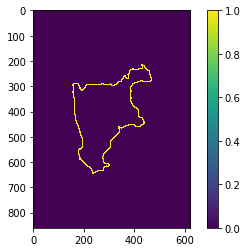

In [109]:
max_dist_px = int(tile_size/8)
seg_close = get_close_pixels(view, ann_id, pixelsize_mm, max_dist_px=max_dist_px)
plt.imshow(seg_close.astype(np.int))
plt.colorbar()

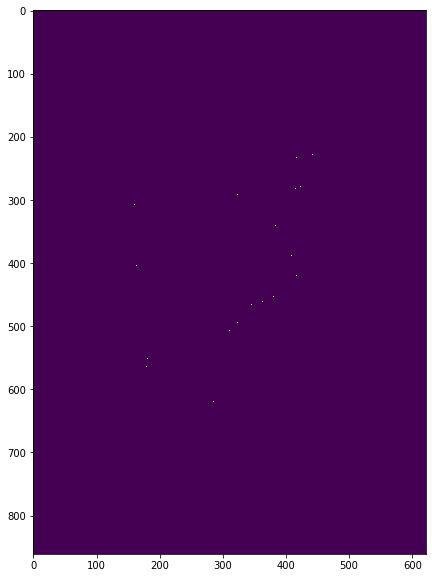

In [110]:

imgs, control = get_patches_along_mask(img, seg_close, max_dist_px, control_image=True)
plt.figure(figsize=(10,10))
plt.imshow(control)
    

In [111]:
# sg1

In [112]:
# global_locations = view.coords_view_px_to_glob_px(*nz)

In [113]:

# global_locations = get_global_centers_from_annotations(anim, outer_ids[0], pixelsize_mm, tile_size, step)

In [114]:
# def get_patches_from_locations(anim, global_locations, pixelsize_mm, tile_size, as_gray=True):
#     imgs = []
#     for i in range(0, len(global_locations[0])):
#         im = anim.get_view(
#             center=[global_locations[1][i], global_locations[0][i]], 
#             size_mm=np.asarray(pixelsize_mm) * (tile_size-0.5), pixelsize_mm=pixelsize_mm
#         ).get_region_image(as_gray=as_gray)
#         imgs.append(im)
#     return imgs
# imgs = get_patches_from_locations(anim, global_locations, pixelsize_mm, tile_size)
# plt.imshow(imgs[1])
# plt.colorbar()

In [115]:
imgs = get_patches_along_annotation(anim, ann_id, pixelsize_mm, tile_size, step)

len(imgs)

45

In [116]:
# plt.figure(figsize=(10,10))
# plt.imshow(view.get_region_image(as_gray=True)[310:350,190:300])

252 420


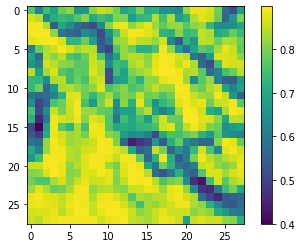

In [117]:
i = 1
plt.imshow(imgs[i])
plt.colorbar()
print(nz[0][i], nz[1][i])

In [118]:
# def get_patches_from_annotation(anim, ann_id, pixelsize_mm, tile_size, as_gray=True):
    
#     global_locations = get_global_centers_from_annotations(anim, ann_id, pixelsize_mm, tile_size, step)
# #     print("len global: ", len(global_locations[0]))
#     imgs = get_patches_from_locations(anim, global_locations, pixelsize_mm, tile_size)
#     return imgs
    

In [119]:
# imgs = get_patches_from_annotation(anim, 11, pixelsize_mm, tile_size)


In [120]:
# plt.imshow(imgs[0])

# Prepare training set

## Lobulus

In [121]:
imgs = []
yl = []


an_ids = anim.select_annotations_by_color("#00FF00")
an_ids

[0, 2, 3, 5, 7, 8]

In [122]:
def create_dataset_lobulus(anim, max_img_number=None):
    imgs = []
    y = []
    an_ids = anim.select_annotations_by_color("#00FF00")
    i = 0
    for ann_id in an_ids:
        outer_ids = anim.select_outer_annotations(ann_id, color="#000000")
    #     print("outerids: ", outer_ids)
        # Make samples from lobulus area
        imgs0 = get_patches_from_inside_of_annotation(anim, outer_ids[0], pixelsize_mm, tile_size, step=step, as_gray=True)
        y0 = [1] * len(imgs0)
        imgs.extend(imgs0)
        y.extend(y0)
#         print("lob len: ", len(imgs0))
        if (max_img_number is not None) and (max_img_number < i):
            continue
        i += 1
    return imgs, y

def create_dataset_lobulus_border(anim, max_img_number=None):
    imgs = []
    y = []
    an_ids = anim.select_annotations_by_color("#00FF00")
    i = 0
    for ann_id in an_ids:
        outer_ids = anim.select_outer_annotations(ann_id, color="#000000")
    #     print("outerids: ", outer_ids)
        # Make samples from lobulus area
        imgs0 = get_patches_along_annotation(anim, outer_ids[0], pixelsize_mm, tile_size, step=step, as_gray=True)
        y0 = [2] * len(imgs0)
        imgs.extend(imgs0)
        y.extend(y0)
#         print("lob len: ", len(imgs0))
        if (max_img_number is not None) and (max_img_number < i):
            continue
        i += 1
    return imgs, y

def create_dataset_septum(anim, max_img_number=None):
    ann_ids = anim.select_annotations_by_color("#FF0000")
    imgs = []
    y = []

    i = 0
    for ann_id in ann_ids:
        imgs0 = get_patches_from_inside_of_annotation(anim, ann_id, pixelsize_mm, tile_size, step=step, as_gray=True)
        y0 = [3] * len(imgs0)
        imgs.extend(imgs0)
        y.extend(y0)
#         print("sep len: ", len(imgs0))
        if (max_img_number is not None) and (max_img_number < i):
            continue
        i += 1
        
    # lobulus edge
    
    return imgs, y

def create_dataset_empty(anim, max_img_number=None):
    ann_ids = anim.select_annotations_by_color("#FF00FF")
    imgs = []
    y = []

    i = 0
    for ann_id in ann_ids:
        imgs0 = get_patches_from_inside_of_annotation(anim, ann_id, pixelsize_mm, tile_size, step=step, as_gray=True)
        y0 = [0] * len(imgs0)
        imgs.extend(imgs0)
        y.extend(y0)
#         print("sep len: ", len(imgs0))
        if (max_img_number is not None) and (max_img_number < i):
            continue
        i += 1
        
    # lobulus edge
    
    return imgs, y
        

def create_dataset_from_imagefile(fn, max_img_number=None):
    """
    Green is used for user input closed curve around central vein. Black closed curve is used for manual segmentation of 
    outline of lobulus. With red closed curve is the septum example delineated.
    """
    imgs = []
    y = []
    # inner lobulus
    anim = scim.AnnotatedImage(fn)
    imgs0, y0 = create_dataset_lobulus_border(anim, max_img_number)
    imgs.extend(imgs0)
    y.extend(y0)
    
    # inner lobulus
    anim = scim.AnnotatedImage(fn)
    imgs0, y0 = create_dataset_lobulus(anim, max_img_number)
    imgs.extend(imgs0)
    y.extend(y0)
    
    # Septum
    anim = scim.AnnotatedImage(fn)
    imgs0, y0 = create_dataset_septum(anim, max_img_number)
    imgs.extend(imgs0)
    y.extend(y0)
    
    # Empty
    anim = scim.AnnotatedImage(fn)
    imgs0, y0 = create_dataset_empty(anim, max_img_number)
    imgs.extend(imgs0)
    y.extend(y0)
    return imgs, y
        
    
    

In [123]:
# # an_ids_sel1 = anim.select_annotations_by_color("#000000", raise_exception_if_not_found=True)
# # type(an_ids_sel1)

# for ann_id in an_ids:
#     outer_ids = anim.select_outer_annotations(ann_id, color="#000000")
# #     print("outerids: ", outer_ids)
#     imgs0 = get_patches_from_annotation(anim, outer_ids[0], pixelsize_mm, tile_size)
#     y0 = [1] * len(imgs0)
#     imgs.extend(imgs0)
#     yl.extend(y0)


## Septum

In [124]:
# an_ids = anim.select_annotations_by_color("#FF0000")

# for ann_id in an_ids:
#     imgs0 = get_patches_from_annotation(anim, ann_id, pixelsize_mm, tile_size)
#     y0 = [2] * len(imgs0)
#     imgs.extend(imgs0)
#     yl.extend(y0)

## Get data from multiple images

In [125]:
fns = [
    io3d.datasets.join_path("medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi", get_root=True),
    io3d.datasets.join_path("medical/orig/Scaffan-analysis/PIG-002_J-18-0091_HE.ndpi", get_root=True),
    io3d.datasets.join_path("medical/orig/Scaffan-analysis/PIG-004_BBJ-004-4_HE_parenchyme.ndpi", get_root=True),
]

In [126]:
imgs = []
yl = []
for fn in fns:
    imgs0, y0 = create_dataset_from_imagefile(fn, 1)
    print(f"lengths: {len(imgs0)} {len(y0)} fn: {fn}")
    imgs.extend(imgs0)
    yl.extend(y0)

2019-07-11 10:00:43.058 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi
2019-07-11 10:00:43.080 | DEBUG    | scaffan.image:__init__:180 - Reading the annotation
2019-07-11 10:00:46.407 | DEBUG    | scaffan.annotation:read_annotations:119 - windows annotation output:b'2019-07-11 10:00:46.099 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\r\n'
2019-07-11 10:00:52.970 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi
2019-07-11 10:00:52.996 | DEBUG    | scaffan.image:__init__:180 - Reading the annotation
2019-07-11 10:00:56.099 | DEBUG    | scaffan.annotation:read_annotations:119 - windows annotation output:b'2019-07-11 10:00:55.813 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-201711

lengths: 1170 1170 fn: C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-003_J-18-0165_HE.ndpi


2019-07-11 10:01:41.238 | DEBUG    | scaffan.annotation:read_annotations:119 - windows annotation output:b'2019-07-11 10:01:40.959 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\r\n'
2019-07-11 10:01:44.674 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-002_J-18-0091_HE.ndpi
2019-07-11 10:01:44.697 | DEBUG    | scaffan.image:__init__:180 - Reading the annotation
2019-07-11 10:01:47.773 | DEBUG    | scaffan.annotation:read_annotations:119 - windows annotation output:b'2019-07-11 10:01:47.494 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\r\n'
2019-07-11 10:01:57.003 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-002_J-18-0091_HE.ndpi
2019-07-11 10:01:57.023 | DEBUG    | scaffan.image:__init__:180 - Readi

lengths: 734 734 fn: C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-002_J-18-0091_HE.ndpi


2019-07-11 10:02:16.447 | DEBUG    | scaffan.annotation:read_annotations:119 - windows annotation output:b'2019-07-11 10:02:16.222 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\r\n'
2019-07-11 10:02:18.320 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-004_BBJ-004-4_HE_parenchyme.ndpi
2019-07-11 10:02:18.336 | DEBUG    | scaffan.image:__init__:180 - Reading the annotation
2019-07-11 10:02:20.889 | DEBUG    | scaffan.annotation:read_annotations:119 - windows annotation output:b'2019-07-11 10:02:20.656 | DEBUG    | scaffan.annotation:ndpa_to_json:71 - PATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\r\n'
2019-07-11 10:02:27.313 | DEBUG    | scaffan.image:__init__:166 - Reading file C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-004_BBJ-004-4_HE_parenchyme.ndpi
2019-07-11 10:02:27.353 | DEBUG    | scaffan.imag

lengths: 836 836 fn: C:\Users\Jirik/data/medical/orig/Scaffan-analysis/PIG-004_BBJ-004-4_HE_parenchyme.ndpi


In [127]:
len(imgs), len(yl)

(2740, 2740)

In [128]:
np.unique(yl, return_counts=True)

(array([0, 1, 2, 3]), array([1006,  770,  630,  334], dtype=int64))

In [129]:
X = np.asarray(imgs)
X = X.reshape(*X.shape, 1)
X.shape
y = np.asarray(yl)
# np.save("X.npy", X)
# np.save("y.npy", y)

In [130]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3]), array([1006,  770,  630,  334], dtype=int64))

In [131]:
h5py
hdf5_path = "scaffan_dataset.hdf5"
# open a hdf5 file and create earrays
hdf5_file = h5py.File(hdf5_path, mode='w')
# hdf5_file.create_dataset("X", X.shape, X.dtype)
# hdf5_file.create_dataset("y", y.shape, y.dtype)
hdf5_file["X"] = X
hdf5_file["y"] = y
hdf5_file["pixelsize_mm"] = pixelsize_mm


# hdf5_file.create_dataset("test_img", test_shape, np.int8)
hdf5_file.close()

In [132]:
X.dtype

dtype('float64')

In [133]:
pwd

'C:\\Users\\Jirik\\projects\\scaffan\\devel'